[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Worksop-2024/blob/main/Practice%20Yourself/Assignment_6.2_Support_Vector_Machines.ipynb)

# Assignment 6.2: Support Vector Machines (SVM)

## Objective:
Implement an **SVM classifier** to classify handwritten digits using the **digits dataset** from Scikit-learn.

### Dataset:
Use the **Digits Dataset** from Scikit-learn (`sklearn.datasets.load_digits()`).

---

## Tasks:

### Task 1: Load and Visualize the Dataset

#### Load the **digits dataset** from Scikit-learn.
```python
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()


#### Display the shape of the dataset
```python
print(f"Dataset shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")



####  Visualize the first few digits with their labels
```python
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Number of samples: 1797
Number of features: 64
Dataset shape: (1797, 64)
Target shape: (1797,)


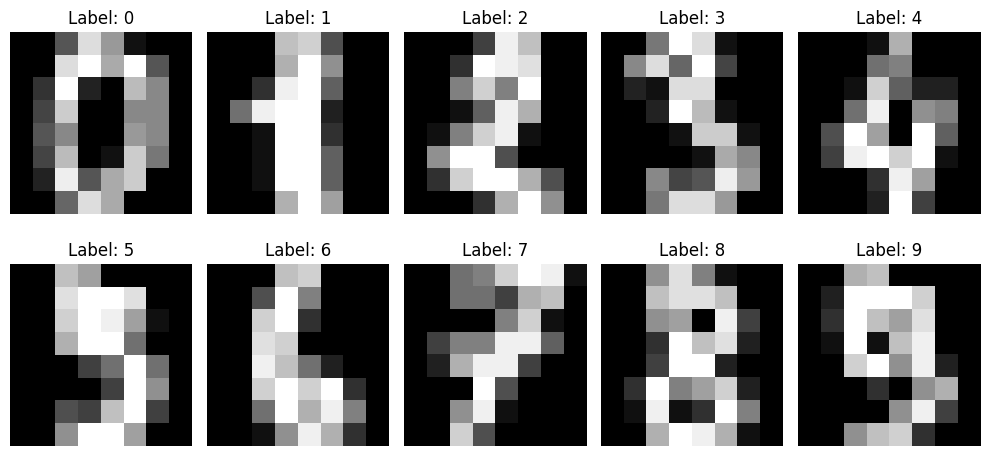

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
y = digits.target
n_samples, n_features = X.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")
print(f"Dataset shape: {digits.data.shape}")
print(f"Target shape: {digits.target.shape}")

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Task 2: Split the Dataset

Split the dataset into training and testing sets using an 80-20 ratio.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1437 samples
Testing set size: 360 samples


### Task 3: Train an SVM Classifier

1.	Train an SVM classifier on the training data using different kernels (linear, rbf, poly).
2.	Observe how the different kernels affect the results.

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    print(f"Accuracy with {kernel} kernel: {accuracy:.2f}")


Accuracy with linear kernel: 0.98
Accuracy with rbf kernel: 0.99
Accuracy with poly kernel: 0.99


### Task 4: Evaluate the SVM Classifier

1.	Calculate the accuracy, precision, recall, and F1-score for each kernel type.
2.	Compare the performance of each kernel.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {}

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    metrics[kernel] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

print("\nPerformance Comparison of SVM Classifiers:")
for kernel, scores in metrics.items():
    print(f"\nKernel: {kernel}")
    for metric, value in scores.items():
        print(f"{metric}: {value:.2f}")



Performance Comparison of SVM Classifiers:

Kernel: linear
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98

Kernel: rbf
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

Kernel: poly
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99


### Task 5: Confusion Matrix

1.	Generate the confusion matrix for the SVM classifier with the best-performing kernel.
2.	Visualize the confusion matrix using a heatmap.

Best-performing kernel: poly


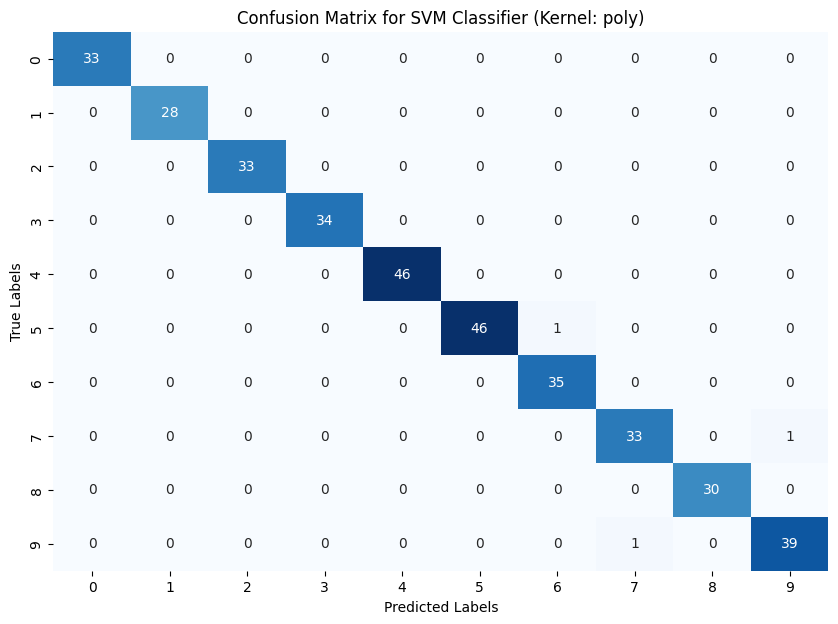

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

best_kernel = max(metrics, key=lambda k: metrics[k]['Accuracy'])
print(f"Best-performing kernel: {best_kernel}")

best_clf = svm.SVC(kernel=best_kernel, random_state=42)
best_clf.fit(X_train, y_train)

y_pred_best = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.title(f'Confusion Matrix for SVM Classifier (Kernel: {best_kernel})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Which model performed better, and why?

-> Looking at the accuracy & pecision scores of each models, I think RBF and Poly outperformed linear by a slight margin..

---